In [1]:
#############################################################
# Import packages, pre-processing
#############################################################
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Import dataset
filename='audiology.standardized.data'
folder="C:/Users/bcm9/Documents/Py_code/Data/"
data = pd.read_csv(folder+filename,header=None)

In [3]:
# Show dataset in full
print(data)
type(data)

    0         1  2       3       4           5  6         7  8  9   ... 61 62  \
0    f      mild  f  normal  normal           ?  t         ?  f  f  ...  f  f   
1    f  moderate  f  normal  normal           ?  t         ?  f  f  ...  f  f   
2    t      mild  t       ?  absent        mild  t         ?  f  f  ...  f  f   
3    t      mild  t       ?  absent        mild  f         ?  f  f  ...  f  f   
4    t      mild  f  normal  normal        mild  t         ?  f  f  ...  f  f   
..  ..       ... ..     ...     ...         ... ..       ... .. ..  ... .. ..   
195  t      mild  f  absent  normal        mild  t         ?  f  f  ...  f  f   
196  t      mild  f  normal  absent        mild  f         ?  f  f  ...  f  f   
197  f    normal  f  normal  normal  unmeasured  f  degraded  f  f  ...  f  f   
198  t      mild  f  normal  normal  unmeasured  f         ?  f  f  ...  f  f   
199  t    normal  f  normal  normal  unmeasured  f         ?  f  f  ...  f  f   

            63 64  65 66 67

pandas.core.frame.DataFrame

In [4]:
#############################################################
# Setup data for modelling
#############################################################
# Audiological predictor data
X=data.iloc[:,0:-2]
# Etiologies (classes)
y=data.iloc[:,-1]

In [5]:
# Represent categorical variables numerically
le = preprocessing.LabelEncoder()

# Transform etiology data
yt=le.fit_transform(y)

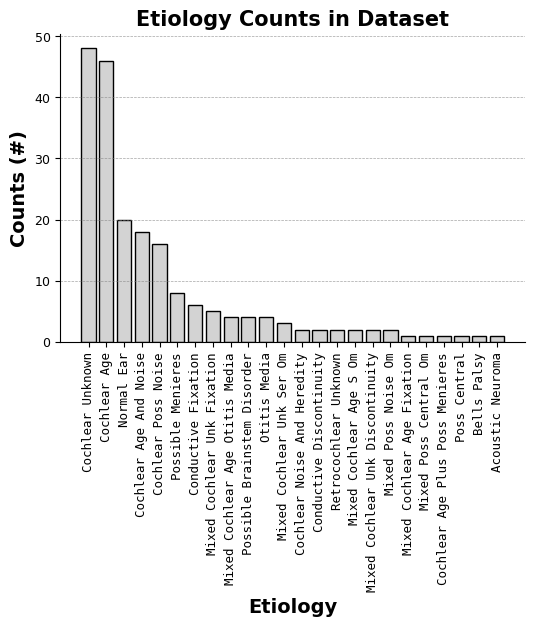

In [6]:
# Bar plot etiology counts
et_string=np.unique(y)
et_counts=np.arange(0,np.max(yt)+1)
for i in et_counts:
    et_counts[i]=(sum(yt==i))   
    
    
# Return indices of sorted array by size
et_sort = np.argsort(et_counts)[::-1]
    
# Clean and order string - replace _ with spaces, and capitalise first letter
et_string_ordered = [s.replace('_', ' ').title() for s in np.array(et_string)[et_sort]]

# Plot
plt.figure(figsize=(6,4))
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
bars = plt.bar(np.arange(0,len(et_counts)),et_counts[et_sort], edgecolor='black', linewidth=1, color='lightgray')
plt.title("Etiology Counts in Dataset", fontsize=15, fontweight='bold')
plt.xlabel("Etiology", fontsize=14, fontweight='bold')
plt.ylabel("Counts (#)", fontsize=14, fontweight='bold')
plt.xticks(range(len(et_string)),et_string_ordered, rotation='vertical', fontsize=9, fontfamily='monospace')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='major', labelsize=9)
plt.show()

In [83]:
# Transform entire audiological predictor data numerically using for loop
Xt=X
for i in np.arange(0,Xt.shape[1]):
    Xt[i] = le.fit_transform(Xt[i])
# Convert dataframe to array
Xt=np.array(Xt)
# Make X original data again (unsure why it gets transformed)    
X=data.iloc[:,0:-2]

C:\Users\bcm9\AppData\Local\Temp\ipykernel_10292\95910049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xt[i] = le.fit_transform(Xt[i])


In [94]:
# Setup training and test data using data with known etiolgies
known_idx=np.array(np.where(yt!=7))
Xt_known=np.squeeze(Xt[known_idx,:])
y2=np.squeeze(yt[known_idx])

In [95]:
# % test set
test_pc=20
ntest=np.round_(Xt_known.shape[0]*(test_pc/100))
# convert float to int
ntest=int(ntest)

# Randomly select indices to split rows into training/testing sets 
trainidx=np.arange(0,Xt_known.shape[0])
testidx=np.array(random.sample(range(Xt_known.shape[0]), ntest))
trainidx = np.delete(trainidx, testidx)

# Split predictor data into training/testing sets
X_train = Xt_known[trainidx,:]
X_test = Xt_known[testidx,:]

# Split target data into training/testing sets
y_train = y2[trainidx]
y_test = y2[testidx]

In [96]:
#############################################################
# Train a Gaussian Naive Bayes classifier
#############################################################
# Setup model
mdl = GaussianNB()

# Fit model
mdl.fit(X_train, y_train)

# Predict y
y_pred = mdl.predict(X_test)

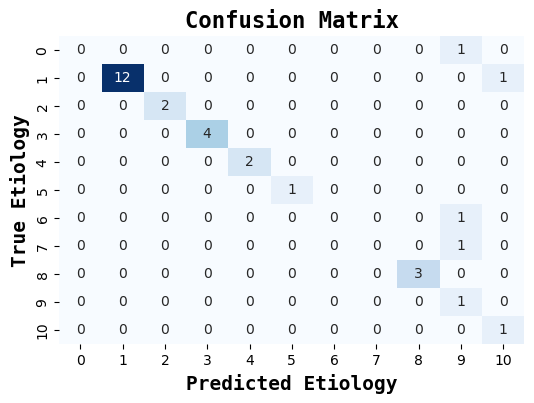

In [97]:
# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Etiology', fontsize=14, fontweight='bold', fontfamily='monospace')
plt.ylabel('True Etiology', fontsize=14, fontweight='bold', fontfamily='monospace')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', fontfamily='monospace')
plt.show()

In [98]:
# Print metrics, evaluation
print('Training set score = {:.3f}'.format(mdl.score(X_train, y_train)))
print('Test set score = {:.3f}'.format(mdl.score(X_test, y_test)))
print(sum(y_test==y_pred),'out of ',len(y_test),'classifications correct')

# Print prediction strings
print(np.column_stack((et_string[y_test]+" predicted as "+et_string[y_pred])))

Training set score = 0.975
Test set score = 0.867
26 out of  30 classifications correct
[['otitis_media predicted as otitis_media'
  'cochlear_age predicted as possible_menieres'
  'normal_ear predicted as normal_ear'
  'cochlear_poss_noise predicted as cochlear_poss_noise'
  'mixed_cochlear_age_otitis_media predicted as mixed_cochlear_age_otitis_media'
  'bells_palsy predicted as otitis_media'
  'cochlear_age predicted as cochlear_age'
  'cochlear_age predicted as cochlear_age'
  'cochlear_age_and_noise predicted as cochlear_age_and_noise'
  'cochlear_poss_noise predicted as cochlear_poss_noise'
  'cochlear_poss_noise predicted as cochlear_poss_noise'
  'cochlear_age predicted as cochlear_age'
  'cochlear_age predicted as cochlear_age'
  'mixed_cochlear_age_s_om predicted as otitis_media'
  'cochlear_age predicted as cochlear_age'
  'cochlear_age predicted as cochlear_age'
  'normal_ear predicted as normal_ear'
  'cochlear_age predicted as cochlear_age'
  'normal_ear predicted as norm

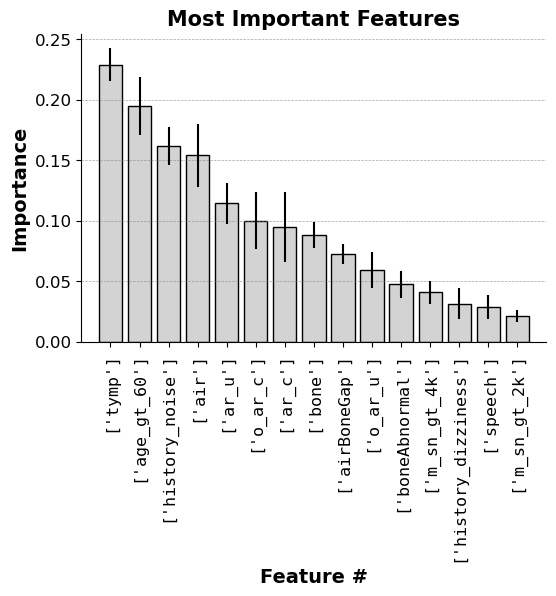

In [99]:
#############################################################
# Calculate feature importance using permutation importance
#############################################################
imps = permutation_importance(mdl, Xt_known, y2)
importance = imps.importances_mean
importance_idx = np.argsort(importance)[::-1]
features=np.arange(0,Xt.shape[1])
imps = permutation_importance(mdl, Xt_known, y2)
importance = imps.importances_mean
importance_idx = np.argsort(importance)[::-1]
features=np.arange(0,Xt.shape[1])
feature_names = pd.read_csv(folder+'audiology.features.csv',header=None)
feature_names = feature_names.values

# # Print feature importance
# print("Feature importance")
# for i in range(Xt_known.shape[1]):
#     print("(%s) (%f)" % (features[importance_idx[i]], importance[importance_idx[i]]))

# Order with importance indices
rankimportance=importance[importance_idx]
featureimportance=features[importance_idx]
featureimportance_std=imps.importances_std[importance_idx]
feature_names_std=feature_names[importance_idx]

# Plot nfplot most important features
nfplot=15
plt.figure(figsize=(6,4))
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
bars = plt.bar(np.arange(0,nfplot),rankimportance[0:nfplot],yerr=featureimportance_std[0:nfplot], edgecolor='black', linewidth=1, color='lightgray')
plt.title("Most Important Features", fontsize=15, fontweight='bold')
plt.xlabel("Feature #", fontsize=14, fontweight='bold')   
plt.ylabel("Importance", fontsize=14, fontweight='bold') 
plt.xticks(np.arange(0,nfplot),feature_names_std[0:nfplot],fontsize=11, fontfamily='monospace',rotation=90)
plt.xlim([-1,nfplot])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [100]:
#############################################################
# Now apply model to data with unknown etiologies
#############################################################
# Setup unknown etiology data
unknown_idx=np.array(np.where(yt==7))
X_unknown=X.iloc[np.squeeze(np.array(unknown_idx, dtype=np.int32))]
Xt_unknown=np.squeeze(Xt[unknown_idx,:])

# Predict etiologies of unknown etiology data
unknown_predict=mdl.predict(Xt_unknown)
et_string[unknown_predict]

# Put data and predictions of unknown into dataframe
predictionDf=pd.DataFrame(X_unknown)
#predictionDf['Predictions']=unknown_predict
predictionDf['StrPredictions']=et_string[unknown_predict]
print(predictionDf)

     0         1  2         3         4           5  6  7  8  9  ... 60 61 62  \
0    f      mild  f    normal    normal           ?  t  ?  f  f  ...  f  f  f   
1    f  moderate  f    normal    normal           ?  t  ?  f  f  ...  f  f  f   
6    f      mild  f    normal    normal        mild  t  ?  f  f  ...  f  f  f   
7    f      mild  f    normal    normal        mild  t  ?  f  f  ...  f  f  f   
8    f    severe  f         ?         ?           ?  t  ?  f  f  ...  f  f  f   
12   f    severe  f    normal    normal    moderate  t  ?  f  f  ...  f  f  f   
19   f    normal  f    normal  elevated           ?  f  ?  f  f  ...  f  f  f   
24   f  moderate  f  elevated  elevated           ?  t  ?  f  f  ...  f  f  f   
25   f    normal  f    normal    normal      normal  t  ?  f  f  ...  f  f  f   
26   f    normal  f    normal  elevated      normal  t  ?  f  f  ...  f  f  f   
29   f      mild  f  elevated    normal        mild  t  ?  f  f  ...  f  f  f   
32   f    normal  f    norma